In [1]:
from __future__ import print_function, division
from data_utils import load_CIFAR10
import numpy as np
import matplotlib.pyplot as plt

X_train, y_train, X_test, y_test = load_CIFAR10("cifar-10-batches-py")

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (50000, 32, 32, 3)
y_train: (50000,)
X_test: (10000, 32, 32, 3)
y_test: (10000,)


plane
44303
28767
30408
4653
43092
13480
4271
car
28362
14668
18206
28127
37650
10133
16250
bird
48391
7047
19888
30705
41990
45692
9150
cat
19787
40066
315
5493
42737
49190
846
deer
5625
45132
21229
528
32017
37602
12204
dog
37451
24339
7031
16277
24952
27348
34945
frog
23706
36687
39559
43117
36348
41049
49636
horse
15881
40374
5771
23259
33618
34583
23585
ship
2003
48227
22827
32448
69
31168
32313
truck
37050
48705
32064
41204
8992
21289
32072


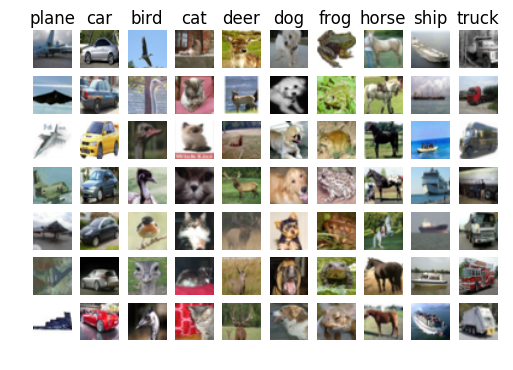

In [2]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    print(cls)
    for i, idx in enumerate(idxs):
        print(idx)
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

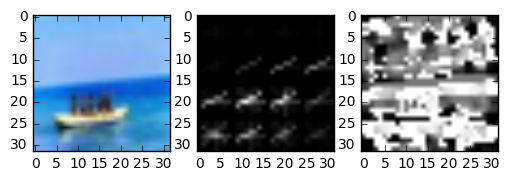

In [29]:
from skimage import exposure, color
from skimage.feature import local_binary_pattern, hog
import cv2

radius = 3
n_points = 8 * radius
METHOD = 'uniform'

index = 22827
img = X_train[index]
save_img = img[:, :, [2, 1, 0]]
cv2.imwrite("original_1.png", save_img.astype("uint8"))


gray_img = color.rgb2gray(X_train[index])

(H, hogImage) = hog(gray_img, orientations=8, pixels_per_cell=(8, 8), 
                            cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
cv2.imwrite('hogImage_1.png', hogImage)

lbp = local_binary_pattern(gray_img, n_points, radius, METHOD)
lbpImage = exposure.rescale_intensity(lbp, out_range=(0, 255))
lbpImage = lbpImage.astype("uint8")
cv2.imwrite('lbpImage_1.png', lbpImage)

plt.subplot(131), plt.imshow(img.astype('uint8'))
plt.subplot(132), plt.imshow(hogImage, cmap="gray")
plt.subplot(133), plt.imshow(lbpImage, cmap="gray")
plt.show()

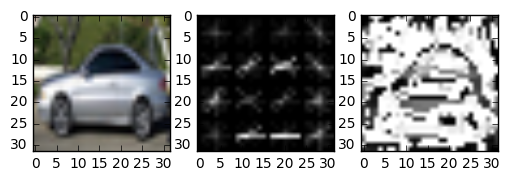

In [27]:
radius = 3
n_points = 8 * radius
METHOD = 'uniform'

index = radius = 3
n_points = 8 * radius
METHOD = 'uniform'

index = 28362
img = X_train[index]
save_img = img[:, :, [2, 1, 0]]
cv2.imwrite("original_2.png", save_img.astype("uint8"))


gray_img = color.rgb2gray(X_train[index])

(H, hogImage) = hog(gray_img, orientations=8, pixels_per_cell=(8, 8), 
                            cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
cv2.imwrite('hogImage_2.png', hogImage)

lbp = local_binary_pattern(gray_img, n_points, radius, METHOD)
lbpImage = exposure.rescale_intensity(lbp, out_range=(0, 255))
lbpImage = lbpImage.astype("uint8")
cv2.imwrite('lbpImage_2.png', lbpImage)

plt.subplot(131), plt.imshow(img.astype('uint8'))
plt.subplot(132), plt.imshow(hogImage, cmap="gray")
plt.subplot(133), plt.imshow(lbpImage, cmap="gray")
plt.show()

In [ ]:
h = np.zeros((64,))
tmp = data_train[i].reshape(-1, 3)
tmp = tmp[:, 0]*16 + tmp[:, 1]*4 + tmp[:, 2]

uni, cnt = np.unique(tmp, return_counts=True)
h[uni] = cnt